In [1]:
from face_enum_graphic import FaceEnumeration
from pathlib import Path

[[5], [5], [3], [0, 1, 2, 3], [0, 1, 4], [0, 3, 4], [1, 2, 4], [2, 3, 4]]


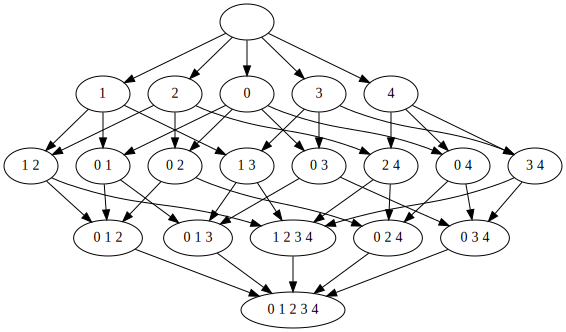

In [2]:
test_face_enum = FaceEnumeration((Path.cwd() / 'Hasse_diagram' / 'examples' / 'pyr4.txt'))
graph = test_face_enum.draw_hasse_diagram()
graph

In [7]:
import json

def read_polymake_format(poly_json):
    python_format = []
    with open(poly_json) as fl:
        poly_dict = json.load(fl)

    python_format = poly_dict.get('VERTICES_IN_FACETS')
    polytope_data = (len(python_format) - 1 , python_format[-1].get('cols'), poly_dict.get('CONE_DIM') - 1)
        
    return python_format[:-1], polytope_data

In [8]:
experiment_jsons = Path(Path.cwd() / 'Hasse_diagram' / 'examples' / 'polymake_examples')

simplex = Path(experiment_jsons / 'cube3.json')
lst, data = read_polymake_format(simplex)


In [9]:
data

(6, 8, 3)

[[6], [8], [3], [0, 2, 4, 6], [1, 3, 5, 7], [0, 1, 4, 5], [2, 3, 6, 7], [0, 1, 2, 3], [4, 5, 6, 7]]


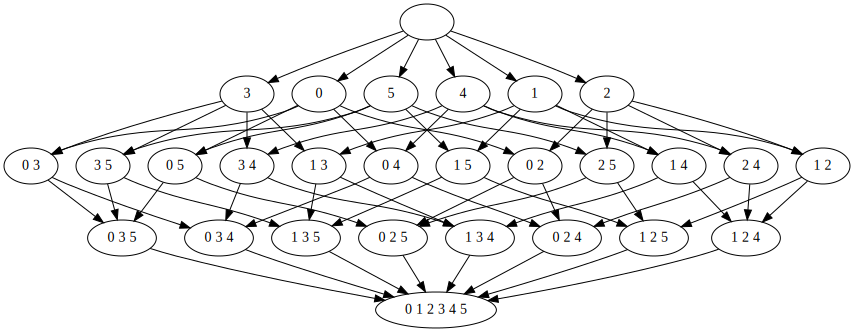

In [13]:
cube3 = FaceEnumeration(lst, data)
graph = cube3.draw_hasse_diagram()
graph